# Import Libraries

In [1]:
!pip install h5py



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Download and Unzip Dataset

In [3]:
# Download the dataset
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 99% 606M/612M [00:04<00:00, 164MB/s]
100% 612M/612M [00:04<00:00, 132MB/s]


In [4]:
# Unzip the dataset
!unzip gtsrb-german-traffic-sign.zip -d /content/gtsrb-german-traffic-sign


Streaming output truncated to the last 5000 lines.
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00010.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00011.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00012.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00013.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00014.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00015.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00016.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00017.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00018.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00019.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00020.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_0

In [5]:
# Check directory structure
!ls /content/gtsrb-german-traffic-sign.zip


/content/gtsrb-german-traffic-sign.zip


In [6]:
os.getcwd()

'/content'

In [7]:
cd/content/gtsrb-german-traffic-sign/Train

/content/gtsrb-german-traffic-sign/Train


In [8]:
os.getcwd()

'/content/gtsrb-german-traffic-sign/Train'

In [9]:

# loading dataset
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [10]:
for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)

In [11]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [13]:

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [14]:
y_train.shape, y_test.shape

((31367, 43), (7842, 43))

# Show Datasets in CSV Format

In [15]:
train_data=pd.read_csv('/content/gtsrb-german-traffic-sign/Train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv('/content/gtsrb-german-traffic-sign/Test.csv',usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)



In [16]:
train_data.head()

,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [17]:
test_data.head()

,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [18]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


In [19]:
cd/content/gtsrb-german-traffic-sign

/content/gtsrb-german-traffic-sign


# Visualize Testing Data

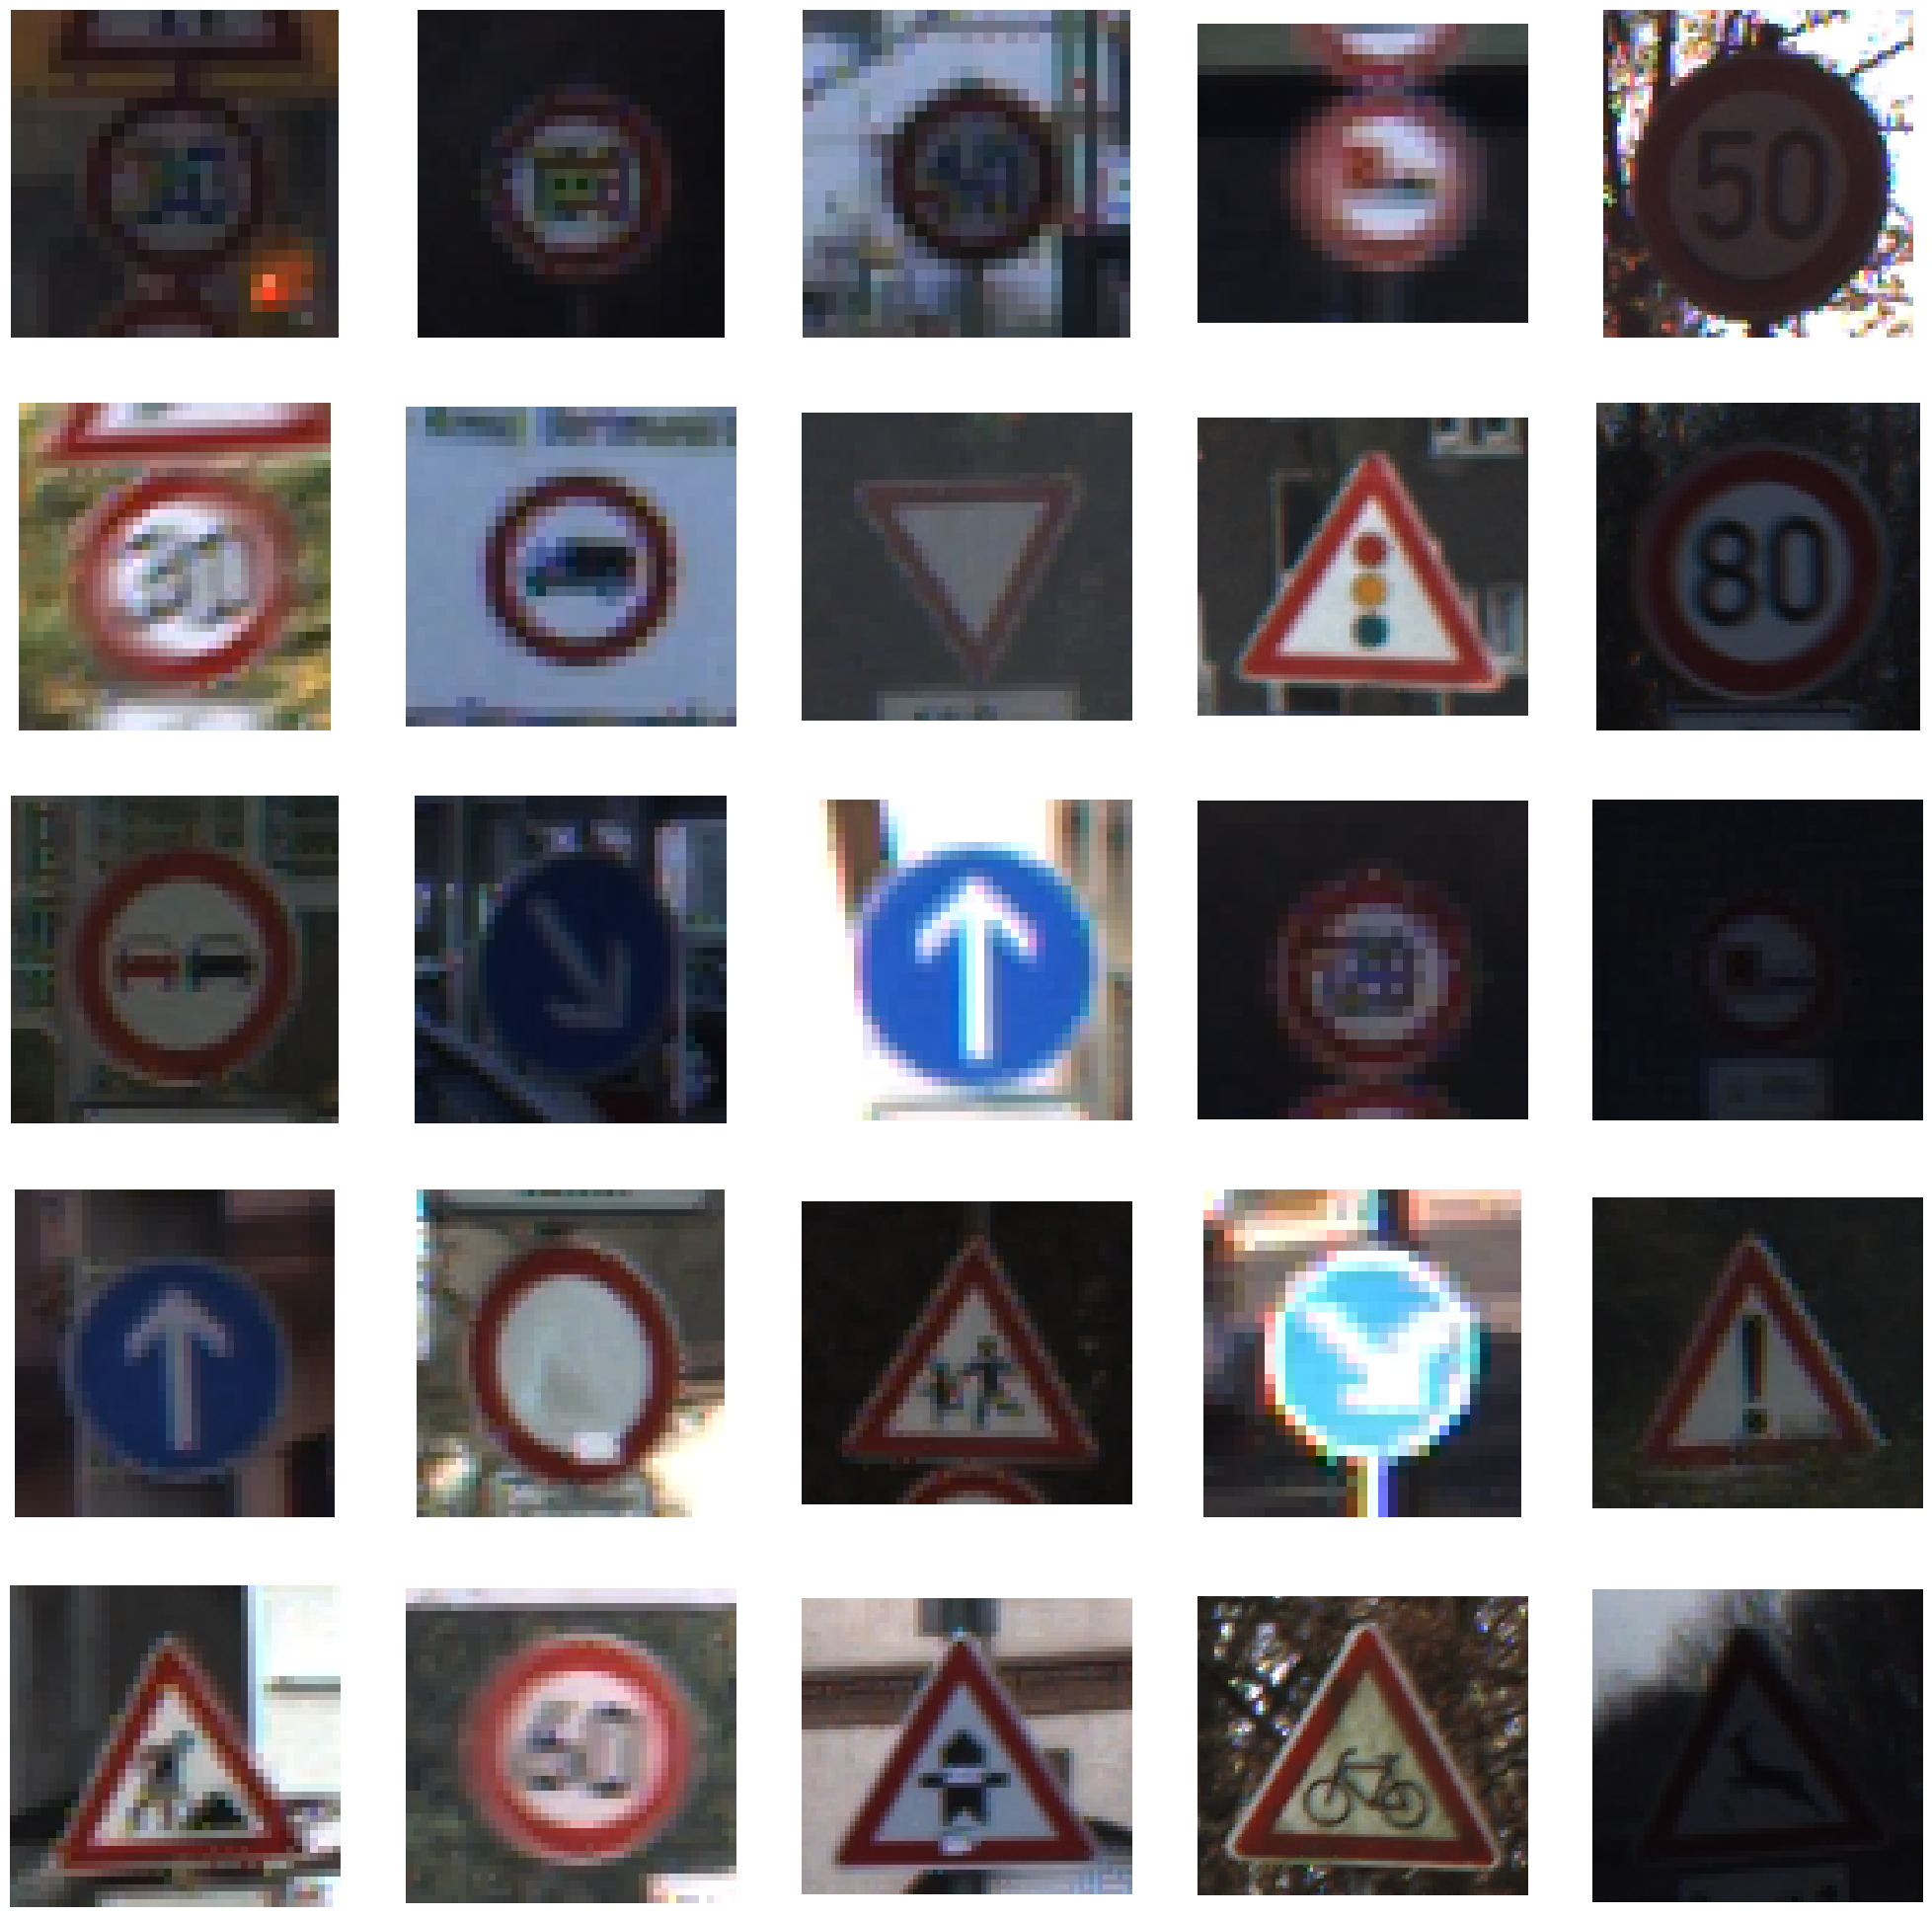

In [20]:
import random
from matplotlib.image import imread
data_dir= os.getcwd()
imgs=test_data['path'].values
plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_image_path=data_dir+'/'+random.choice(imgs)
    random_image=imread(random_image_path)
    plt.imshow(random_image)
    plt.grid(False)
    plt.axis('off')
    plt.xlabel(random_image.shape[0],fontsize=20)
    plt.ylabel(random_image.shape[0],fontsize=20)

In [21]:
cd/content/gtsrb-german-traffic-sign/Train

/content/gtsrb-german-traffic-sign/Train


Visualize the Training Datasets in Sorted Grids Format

Text(0, 0.5, 'Number of images')

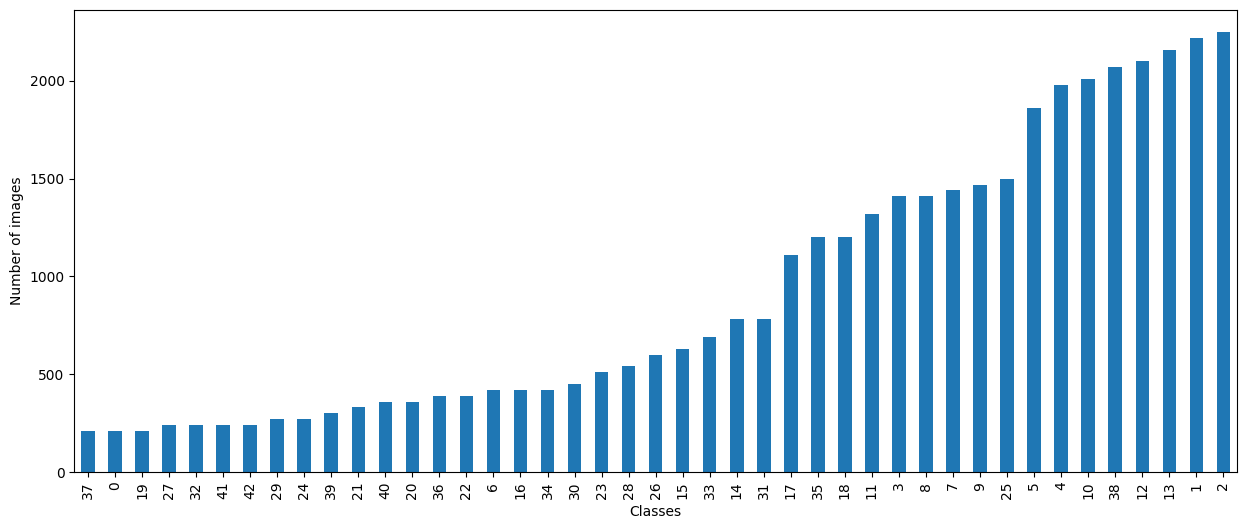

In [22]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

# Build a CNN Model

In [23]:
#Building the model
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
!pip install visualkeras
import visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 25.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


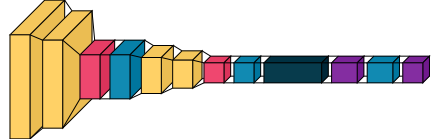

In [26]:
visualkeras.layered_view(model)

# Compile and Train the Model

In [27]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.2014 - loss: 4.2350 - val_accuracy: 0.6780 - val_loss: 1.2423
Epoch 2/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.5759 - loss: 1.4505 - val_accuracy: 0.8271 - val_loss: 0.6234
Epoch 3/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7316 - loss: 0.8739 - val_accuracy: 0.8926 - val_loss: 0.3844
Epoch 4/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8094 - loss: 0.6174 - val_accuracy: 0.9379 - val_loss: 0.2250
Epoch 5/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8604 - loss: 0.4696 - val_accuracy: 0.9264 - val_loss: 0.2649
Epoch 6/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8772 - loss: 0.3920 - val_accuracy: 0.9430 - val_loss: 0.2113
Epoch 7/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8954 - loss: 0.3427 - val_accuracy: 0.9753 - val_loss: 0.0959
Epoch 8/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9160 - loss: 0.2741 - val_accuracy:

# Save the model

In [28]:
model.save("my_model.keras")

# Plotting Graphs for Accuracy


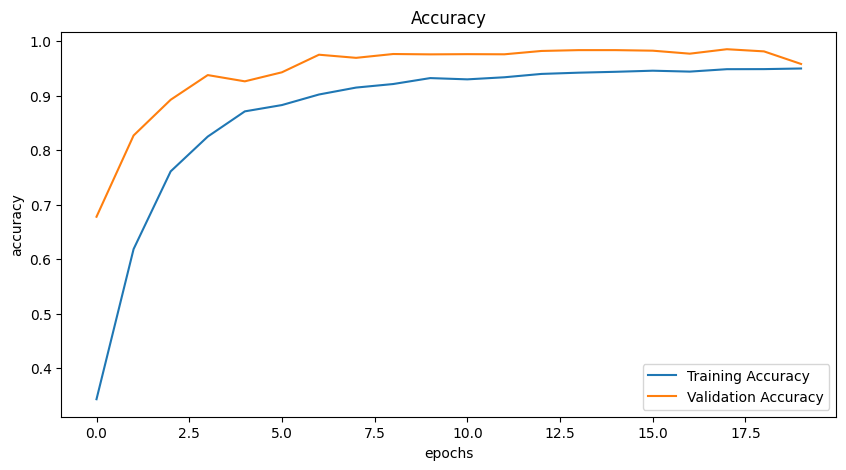

In [29]:
#Plotting Graphs for Accuracy
plt.figure(figsize = (10,5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

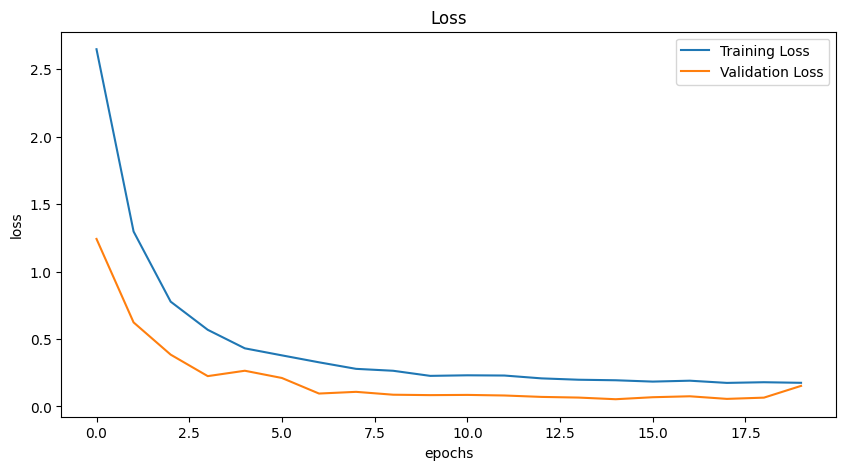

In [30]:
#Plotting Graphs for loss
plt.figure(figsize = (10,5))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Evaluation

In [31]:

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.15268634259700775
Test accuracy 0.9583014249801636


In [32]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [33]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        39
           1       0.92      0.97      0.94       433
           2       0.93      0.94      0.94       450
           3       0.99      0.93      0.96       297
           4       0.99      0.94      0.96       421
           5       0.89      0.95      0.92       371
           6       0.99      1.00      0.99        73
           7       0.80      0.97      0.88       274
           8       0.99      0.74      0.85       299
           9       1.00      0.95      0.97       281
          10       0.95      1.00      0.97       414
          11       0.99      0.97      0.98       275
          12       0.98      0.99      0.98       362
          13       0.99      0.99      0.99       437
          14       0.94      0.99      0.96       163
          15       0.92      1.00      0.96       153
          16       0.99      0.99      0.99        95
          17       1.00    

In [34]:
print(confusion_matrix(y_test_class,y_pred_class))

[[ 36   3   0 ...   0   0   0]
 [  0 418   8 ...   0   0   0]
 [  0  10 423 ...   0   0   0]
 ...
 [  0   1   2 ...  81   0   0]
 [  0   0   0 ...   0  44   0]
 [  0   0   0 ...   0   0  39]]


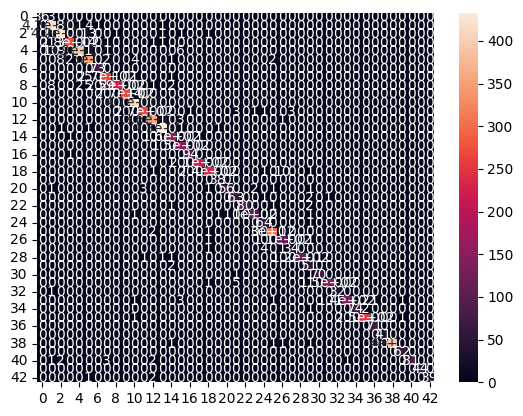

In [35]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_class)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h1.png')


In [36]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)
score

0.958301453710788

In [37]:
model.save('traffic_classifier.keras')

# Build the simple app using Tkinter

In [38]:
!pip install pyvirtualdisplay


In [39]:
!apt-get update
!apt-get install -y xvfb


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,458 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [3,353 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Package

In [40]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(800, 600))
display.start()

In [45]:
!pip install pyngrok

In [46]:
from pyngrok import ngrok

# Establish an HTTP tunnel on the default Streamlit port (8501)
public_url = ngrok.connect(port=8501)
print(f"Streamlit app is live at: {public_url}")


ERROR:pyngrok.process.ngrok:t=2024-11-09T13:37:40+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-11-09T13:37:40+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-11-09T13:37:40+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.